<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [25]:
data = pd.read_csv("DMV_Written_Tests.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
DMV_Test_1    100 non-null float64
DMV_Test_2    100 non-null float64
Results       100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [29]:
scores = data[['DMV_Test_1','DMV_Test_2']].values
results = data['Results'].values

### Task 3: Visualize the Data
---

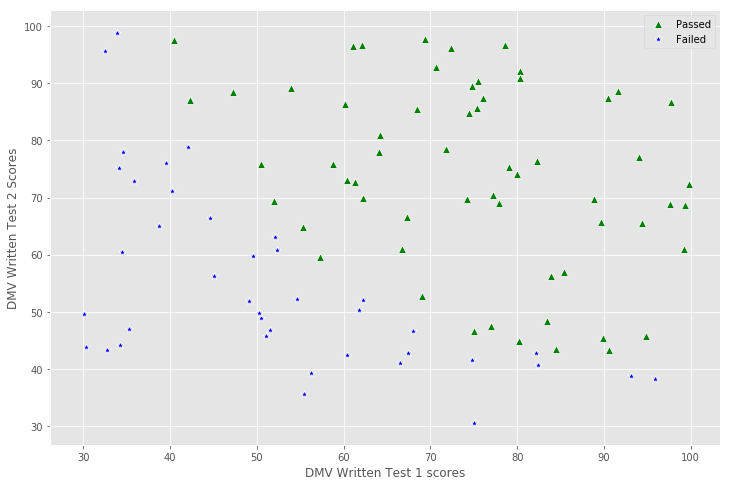

In [32]:
passed = (results == 1).reshape(100,1)
failed = (results == 0).reshape(100,1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],  #seaborn function for sctaterplot
                    y = scores[passed[:, 0], 1],
                     marker = "^",
                     color = 'green',
                     s = 60)  #size of the points

ax = sns.scatterplot(x = scores[failed[:, 0], 0],  #seaborn function for sctaterplot
                     y = scores[failed[:, 0], 1],
                     marker = "*",
                     color ='blue',
                     s = 60)
ax.set(xlabel="DMV Written Test 1 scores", ylabel="DMV Written Test 2 Scores") #to set the labes for x and y axis 
ax.legend(['Passed', 'Failed']) #to create legend in the scatterplot
plt.show() #plot the graph

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [18]:

#inputs are the z value and 0.5 is the threshold
def logistic_function(x):
    return 1/(1+np.exp(-x)) #numpy library used for exponential

In [19]:
logistic_function(0)

0.5

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [36]:
#we need to minimise the negative log likelyhood, that is the cost function
#we will use the gradient dessent to minimise the cost function
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x, theta)) #using munpy for dot product of x and theta
    error = (y* np.log(y_pred)) + (1-y)*np.log(1-y_pred)
    cost = -1/m * sum(error)
    gradient = 1 / m* np.dot(x.transpose(),(y_pred - y))
    return cost[0], gradient

### Task 6: Cost and Gradient at Initialization
---

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [42]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores,axis=0)
scores = (scores - mean_scores) / std_scores

rows = scores.shape[0]
cols = scores.shape[1]

x = np.append(np.ones((rows,1)), scores, axis=1)
y = results.reshape(rows,1)

theta_init = np.zeros((cols + 1,1))
cost, gradient = compute_cost(theta_init, x,y)

print("Cost at Initialization", cost)
print("Gradients at Intilization", gradient)

Cost at Initialization 0.693147180559946
Gradients at Intilization [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [50]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations): 
        cost, gradient = compute_cost(theta, x, y) 
        theta -= (alpha*gradient)
        costs.append(cost)
    return theta, costs

In [51]:
theta, costs = gradient_descent(x, y, theta_init, 1, 200)
print(" Theta after:", theta)
print("Resulting cost", costs[-1])

 Theta after: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost 0.2048938203512014


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of Cost Function over Iterations of gradient')

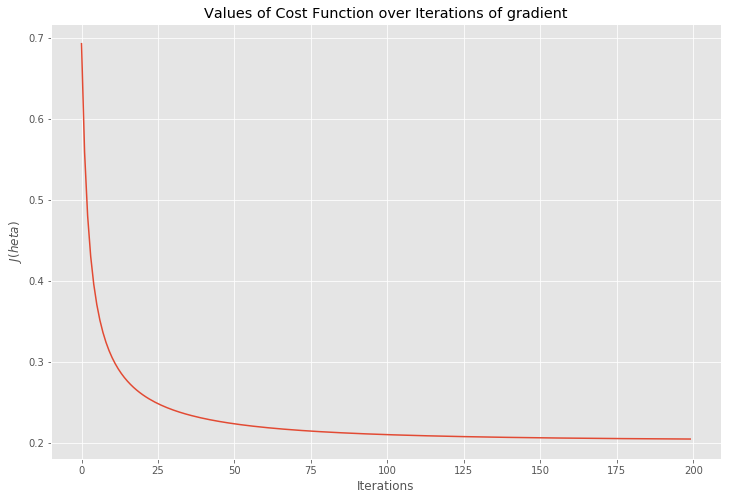

In [52]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\theta)$")
plt.title("Values of Cost Function over Iterations of gradient")
#PLot specifics

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

In [60]:
passed = (results == 1).reshape(100,1)
failed = (results == 0).reshape(100,1)

ax = sns.scatterplot(x = X[passed[:, 0], 1],  #seaborn function for sctaterplot
                    y = X[passed[:, 0], 2],
                     marker = "^",
                     color = 'green',
                     s = 60)  #size of the points

ax = sns.scatterplot(x = X[failed[:, 0], 1],  #seaborn function for sctaterplot
                     y = X[failed[:, 0], 2],
                     marker = "X",
                     color ='blue',
                     s = 60)

NameError: name 'X' is not defined

In [57]:

ax.legend(['Passed', 'Failed'])
ax.set(xlabel ="DMV Written Test Scores 1", ylabel = "DMV Written Test Scores 2 ")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = (theta[0]+theta[1] * x_boundary) / theta[2]

sns.Lineplot(x=x_boundary, y=y_boundary, color="blue")
plt.show();

NameError: name 'X' is not defined

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [ ]:
def predict(theta,x);
    results = x.dot(theta)
    return results>0

In [59]:
p = predict(theta, x)
print("Training Accuracy:", sum(p==y)[0],"%)"

SyntaxError: unexpected EOF while parsing (<ipython-input-59-b1877fe4faa4>, line 2)

In [ ]:
test = np.array([56, 791])
tes t=(test-mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot (theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[e], 2), "probability of passing")